In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
tickers = [
    'AAPL',  # Apple Inc. (Technology)
    'MSFT',  # Microsoft Corporation (Technology)
    'GOOGL', # Alphabet Inc. (Technology)
    'AMZN',  # Amazon.com Inc. (Consumer Discretionary)
    'TSLA',  # Tesla Inc. (Consumer Discretionary)
    'FB',    # Meta Platforms Inc. (Communication Services)
    'NFLX',  # Netflix Inc. (Communication Services)
    'NVDA',  # NVIDIA Corporation (Technology)
    'JPM',   # JPMorgan Chase & Co. (Financials)
    'V',     # Visa Inc. (Financials)
    'MA',    # Mastercard Incorporated (Financials)
    'JNJ',   # Johnson & Johnson (Healthcare)
    'UNH',   # UnitedHealth Group Incorporated (Healthcare)
    'PFE',   # Pfizer Inc. (Healthcare)
    'MRK',   # Merck & Co., Inc. (Healthcare)
    'XOM',   # Exxon Mobil Corporation (Energy)
    'CVX',   # Chevron Corporation (Energy)
    'WMT',   # Walmart Inc. (Consumer Staples)
    'KO',    # The Coca-Cola Company (Consumer Staples)
    'PEP',   # PepsiCo Inc. (Consumer Staples)
    'T',     # AT&T Inc. (Telecommunications)
    'VZ',    # Verizon Communications Inc. (Telecommunications)
    'DIS',   # The Walt Disney Company (Communication Services)
    'NKE',   # Nike Inc. (Consumer Discretionary)
    'ADBE',  # Adobe Inc. (Technology)
    'INTC',  # Intel Corporation (Technology)
    'CSCO',  # Cisco Systems Inc. (Technology)
    'BA',    # Boeing Co. (Industrials)
    'CAT',   # Caterpillar Inc. (Industrials)
    'MMM',   # 3M Company (Industrials)
    'MDT',   # Medtronic plc (Healthcare)
    'LMT',   # Lockheed Martin Corporation (Aerospace & Defense)
    'TMO',   # Thermo Fisher Scientific Inc. (Healthcare)
    'AMGN',  # Amgen Inc. (Healthcare)
    'TXN',   # Texas Instruments Incorporated (Technology)
    'QCOM',  # Qualcomm Incorporated (Technology)
    'LRCX',  # Lam Research Corporation (Technology)
    'SBUX',  # Starbucks Corporation (Consumer Discretionary)
    'CHTR',  # Charter Communications Inc. (Communication Services)
    'SPGI',  # S&P Global Inc. (Financials)
    'NOW',   # ServiceNow Inc. (Technology)
    'ZM',    # Zoom Video Communications, Inc. (Communication Services)
    'VRTX',  # Vertex Pharmaceuticals Incorporated (Healthcare)
    'BIIB',  # Biogen Inc. (Healthcare)
    'GILD',  # Gilead Sciences Inc. (Healthcare)
    'NVS',   # Novartis AG (Healthcare)
    'AZN',   # AstraZeneca plc (Healthcare)
    'HSY',   # The Hershey Company (Consumer Staples)
    'MCD',   # McDonald's Corporation (Consumer Discretionary)
    'CPB',   # Campbell Soup Company (Consumer Staples)
    'AMAT',  # Applied Materials, Inc. (Technology)
    'KMB',   # Kimberly-Clark Corporation (Consumer Staples)
]

In [14]:
# Create initial dataframe

start = '2000-01-01'

df = yf.download(tickers,start)

df = df.stack().reset_index()

columns = {column: column.replace(' ', '_').lower() for column in df.columns}

df = df.rename(columns=columns)

df = df.sort_values(['ticker', 'date'])

df

[*********************100%***********************]  52 of 52 completed

1 Failed download:
['FB']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
/tmp/ipykernel_3368020/3007567578.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack().reset_index()


Price,date,ticker,adj_close,close,high,low,open,volume
0,2000-01-03 00:00:00+00:00,AAPL,0.844004,0.999442,1.004464,0.907924,0.936384,535796800.0
43,2000-01-04 00:00:00+00:00,AAPL,0.772846,0.915179,0.987723,0.903460,0.966518,512377600.0
86,2000-01-05 00:00:00+00:00,AAPL,0.784155,0.928571,0.987165,0.919643,0.926339,778321600.0
129,2000-01-06 00:00:00+00:00,AAPL,0.716296,0.848214,0.955357,0.848214,0.947545,767972800.0
172,2000-01-07 00:00:00+00:00,AAPL,0.750226,0.888393,0.901786,0.852679,0.861607,460734400.0
...,...,...,...,...,...,...,...,...
298640,2024-09-23 00:00:00+00:00,ZM,68.790001,68.790001,68.959999,67.510002,67.660004,2526600.0
298691,2024-09-24 00:00:00+00:00,ZM,69.430000,69.430000,70.169998,68.651001,69.410004,2294700.0
298742,2024-09-25 00:00:00+00:00,ZM,67.949997,67.949997,69.360001,67.785004,68.959999,2479900.0
298793,2024-09-26 00:00:00+00:00,ZM,68.900002,68.900002,69.349998,68.129997,68.430000,2018900.0


In [15]:
# Generate features

df['ret'] = df.groupby('ticker')['adj_close'].pct_change()
df['log_ret'] = np.log(1+df['ret'])

df = df.dropna().reset_index(drop=True)

df

Price,date,ticker,adj_close,close,high,low,open,volume,ret,log_ret
0,2000-01-04 00:00:00+00:00,AAPL,0.772846,0.915179,0.987723,0.903460,0.966518,512377600.0,-0.084310,-0.088078
1,2000-01-05 00:00:00+00:00,AAPL,0.784155,0.928571,0.987165,0.919643,0.926339,778321600.0,0.014633,0.014527
2,2000-01-06 00:00:00+00:00,AAPL,0.716296,0.848214,0.955357,0.848214,0.947545,767972800.0,-0.086538,-0.090514
3,2000-01-07 00:00:00+00:00,AAPL,0.750226,0.888393,0.901786,0.852679,0.861607,460734400.0,0.047369,0.046281
4,2000-01-10 00:00:00+00:00,AAPL,0.737031,0.872768,0.912946,0.845982,0.910714,505064000.0,-0.017588,-0.017744
...,...,...,...,...,...,...,...,...,...,...
298789,2024-09-23 00:00:00+00:00,ZM,68.790001,68.790001,68.959999,67.510002,67.660004,2526600.0,0.018658,0.018486
298790,2024-09-24 00:00:00+00:00,ZM,69.430000,69.430000,70.169998,68.651001,69.410004,2294700.0,0.009304,0.009261
298791,2024-09-25 00:00:00+00:00,ZM,67.949997,67.949997,69.360001,67.785004,68.959999,2479900.0,-0.021316,-0.021547
298792,2024-09-26 00:00:00+00:00,ZM,68.900002,68.900002,69.349998,68.129997,68.430000,2018900.0,0.013981,0.013884


In [16]:
pivot = df[['date', 'ticker', 'ret']]

pivot = pivot.pivot(index='date', columns='ticker', values='ret')

pivot = pivot.dropna(axis=1, how='any')

mse_matrix = pd.DataFrame(index=pivot.columns, columns=pivot.columns)

def compute_beta(x, y):
    covariance = np.cov(x, y)[0][1]
    variance = np.var(x)

    return covariance / variance

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

for a in pivot.columns:
    for b in pivot.columns:
        beta = compute_beta(pivot[a],pivot[b])
        pred = beta * pivot[a]
        mse = compute_mse(pred, pivot[b])
        mse_matrix.loc[a, b] = mse * 10000

mse_matrix = mse_matrix.astype(float)

mse_matrix.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CPB,...,SBUX,SPGI,T,TMO,TXN,UNH,VRTX,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.554275e-07,5.779561e+00,5.920655e+00,3.412888e+00,8.393529e+00,2.669943,4.492700,8.057127,3.561908,2.103658,...,3.915675,3.121666,2.438538,2.857863,4.564132,3.541756,10.644529,2.119832,2.027879,2.567468
ADBE,4.846732e+00,1.853422e-07,5.476166e+00,3.303179e+00,7.987631e+00,2.668250,4.417324,7.826691,3.567952,2.097775,...,3.815884,3.043778,2.467498,2.802951,4.224616,3.509878,10.343723,2.111101,2.014787,2.580616
AMAT,4.663093e+00,5.143123e+00,1.973441e-07,3.338936e+00,8.137902e+00,2.670475,4.247285,7.948683,3.372672,2.115513,...,3.827492,3.081193,2.435914,2.785653,2.878220,3.591235,10.471554,2.118513,2.032507,2.512489
AMGN,5.486188e+00,6.331794e+00,6.814790e+00,9.668958e-08,8.955871e+00,2.535777,4.537677,6.851553,3.706180,2.024701,...,4.066942,3.195747,2.386980,2.833631,5.068983,3.416558,9.701515,2.073924,1.980121,2.508363
AMZN,5.183876e+00,5.882662e+00,6.381431e+00,3.440877e+00,2.516624e-07,2.714968,4.601320,8.133361,3.729636,2.123551,...,4.027272,3.218568,2.536943,2.923986,4.822246,3.650967,10.761151,2.155319,2.060228,2.670721


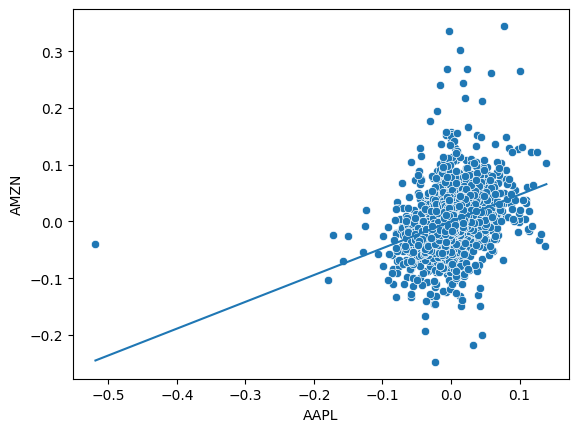

MSE: 0.00016738322174813128
MSE: 0.00016738322174813128


In [17]:
x = np.linspace(pivot['AAPL'].min(), pivot['AAPL'].max(), 100)
beta = compute_beta(pivot['AAPL'], pivot['AMZN'])
y = x * beta

mse = compute_mse(beta*pivot['AAPL'], pivot['AAPL'])
sns.scatterplot(data=pivot, x='AAPL', y='AMZN')
sns.lineplot(x=x, y=y)
plt.show()

print(f"MSE: {mse}")
print(f"MSE: {mse}")

In [18]:
corr = pivot.corr()

corr.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CPB,...,SBUX,SPGI,T,TMO,TXN,UNH,VRTX,VZ,WMT,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.440138,0.473810,0.296221,0.371093,0.227620,0.293698,0.251763,0.355243,0.133352,...,0.355823,0.351171,0.267060,0.346286,0.436695,0.252882,0.278556,0.250432,0.257972,0.267097
ADBE,0.440138,1.000000,0.531767,0.342275,0.423749,0.229238,0.318863,0.300392,0.353499,0.143429,...,0.386115,0.381312,0.245721,0.370268,0.500949,0.269507,0.322143,0.258126,0.269600,0.258298
AMAT,0.473810,0.531767,1.000000,0.328160,0.405323,0.227690,0.369177,0.275947,0.415866,0.111108,...,0.382964,0.367506,0.269145,0.377629,0.699766,0.226640,0.304673,0.251785,0.254197,0.302315
AMGN,0.296221,0.342275,0.328160,1.000000,0.283546,0.315588,0.278035,0.451186,0.302104,0.233806,...,0.305537,0.320861,0.301756,0.357578,0.318487,0.312117,0.399338,0.288259,0.297817,0.304776
AMZN,0.371093,0.423749,0.405323,0.283546,1.000000,0.189764,0.253591,0.233769,0.292203,0.092647,...,0.319414,0.310494,0.184340,0.316078,0.380857,0.188448,0.260150,0.217033,0.227618,0.184964


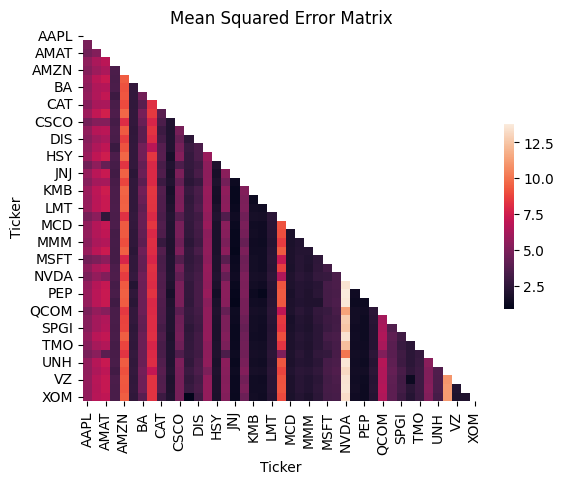

In [19]:
mask = np.triu(np.ones_like(mse_matrix, dtype=bool))

sns.heatmap(mse_matrix, mask=mask, cbar_kws={"shrink": .5})
plt.title("Mean Squared Error Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

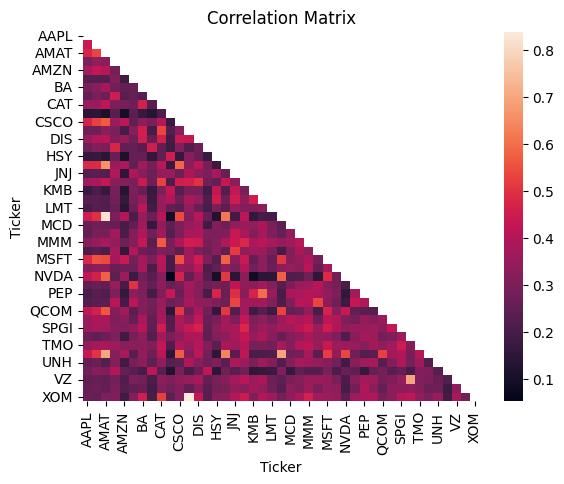

In [20]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask)
plt.title("Correlation Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

In [21]:
# Clustering

df2: pd.DataFrame = df.copy()

for x in [50,100,150]:
    df2[f'ret_{x}'] = df2.groupby('ticker')['log_ret'].rolling(x,x).sum().reset_index(drop=True)
    df2[f'ret_{x}'] = df2.groupby('ticker')[f'ret_{x}'].shift(1)

aggregate = df2.groupby('ticker').agg({'ret_50':'last', 'ret_100': 'last', 'ret_150': 'last'})

aggregate

Price,ret_50,ret_100,ret_150
ticker,,,
AAPL,-0.004803,0.218190,0.212806
ADBE,-0.088535,0.058326,-0.042154
AMAT,-0.046782,0.030424,0.052018
AMGN,-0.043685,0.038796,0.126400
AMZN,0.017041,0.026236,0.090728
AZN,-0.013881,0.029813,0.204229
BA,-0.178779,-0.151078,-0.265078
BIIB,-0.164998,-0.116451,-0.139043
CAT,0.092695,0.153329,0.201477


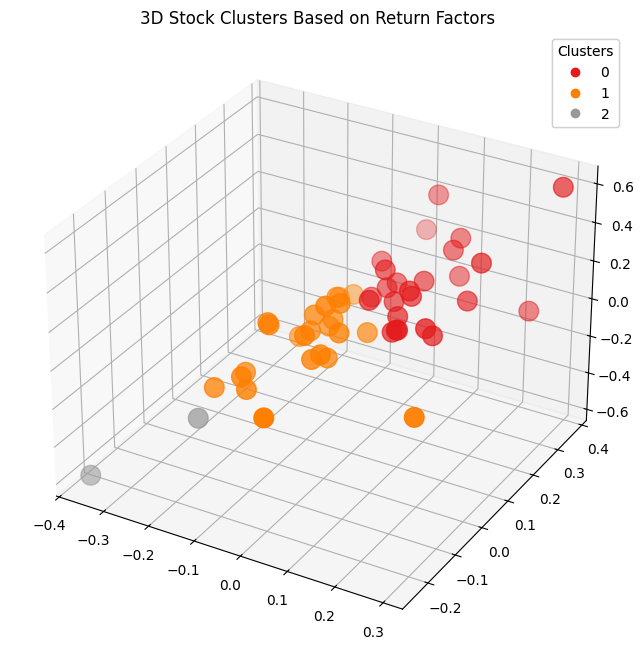

In [22]:
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregate)

n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
aggregate['Cluster'] = kmeans.fit_predict(scaled_data)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(aggregate['ret_50'], aggregate['ret_100'], aggregate['ret_150'], c=aggregate['Cluster'], s=200, cmap='Set1')

ax.set_title('3D Stock Clusters Based on Return Factors')
# ax.set_xlabel('50 Day Return')
# ax.set_ylabel('100 Day Return')
# ax.set_zlabel('150 Day Return')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()